In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import stats
%matplotlib inline

In [2]:
df = pd.read_excel('D:/Data/index/881001.WI.xlsx')

In [3]:
# ret = df.resample('M').last().pct_change().dropna()
ret = df.pct_change().dropna()

In [4]:
skew = ret.rolling(window=243).apply(lambda x: stats.skew(x))

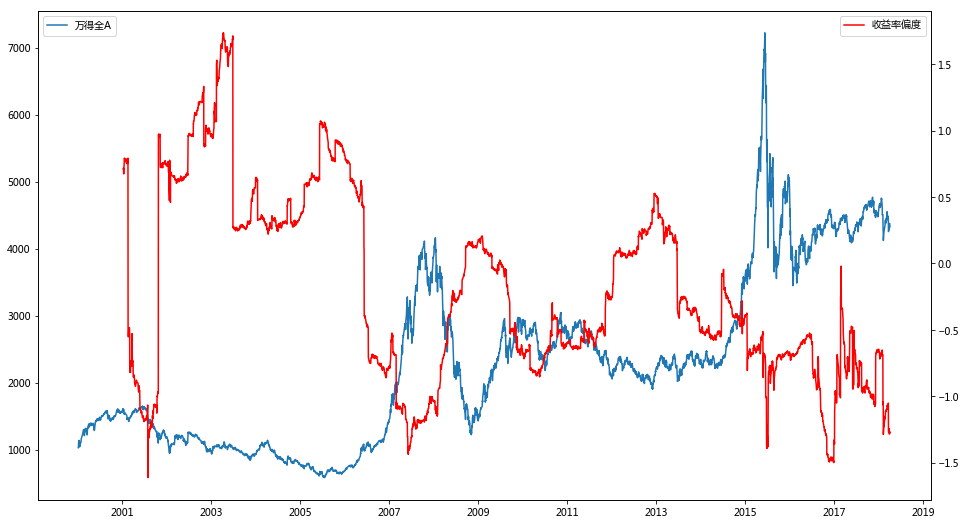

In [6]:
fig, ax1 = plt.subplots(figsize=(16, 9))
ax1.plot(df['close'], label=u'万得全A')
ax2 = ax1.twinx()
ax2.plot(skew, label=u'收益率偏度', color='red')
ax2.legend()
ax1.legend(loc='upper left')

In [18]:
rank_skew = skew.rolling(60).apply(lambda x: pd.Series(x).rank(pct=True).iloc[-1])

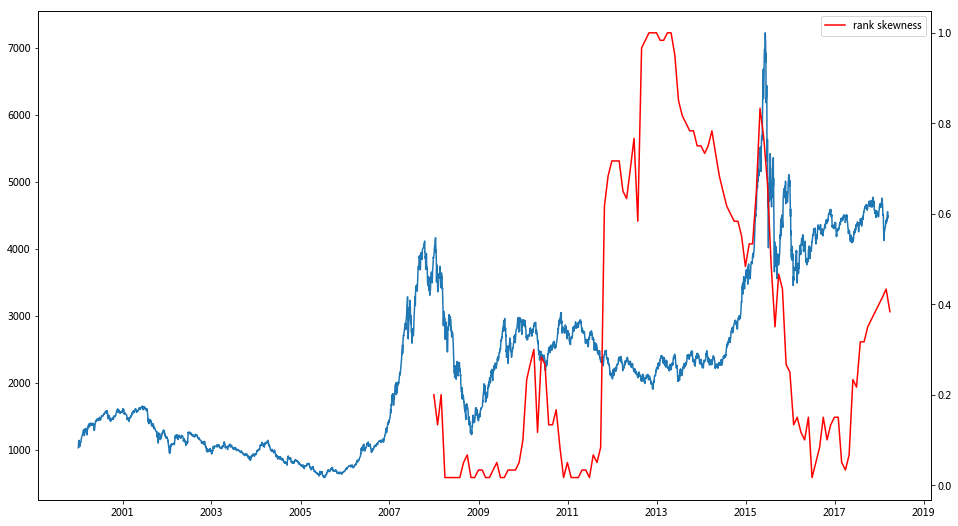

In [19]:
fig, ax1 = plt.subplots(figsize=(16, 9))
ax1.plot(df['close'])
ax2 = ax1.twinx()
ax2.plot(rank_skew, label='rank skewness', color='red')
ax2.legend()

In [21]:
log_ret = np.log(df['close']) - np.log(df['close'].shift(1))

In [27]:
skew = log_ret.rolling(window=729).apply(lambda x: stats.skew(x))

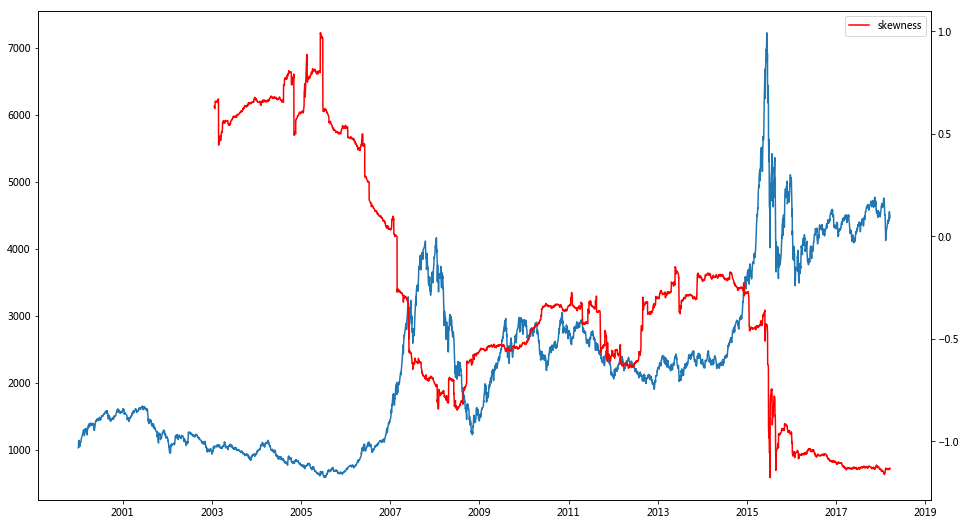

In [28]:
fig, ax1 = plt.subplots(figsize=(16, 9))
ax1.plot(df['close'])
ax2 = ax1.twinx()
ax2.plot(skew, label='skewness', color='red')
ax2.legend()

In [29]:
rank_skew = skew.rolling(729).apply(lambda x: pd.Series(x).rank(pct=True).iloc[-1])

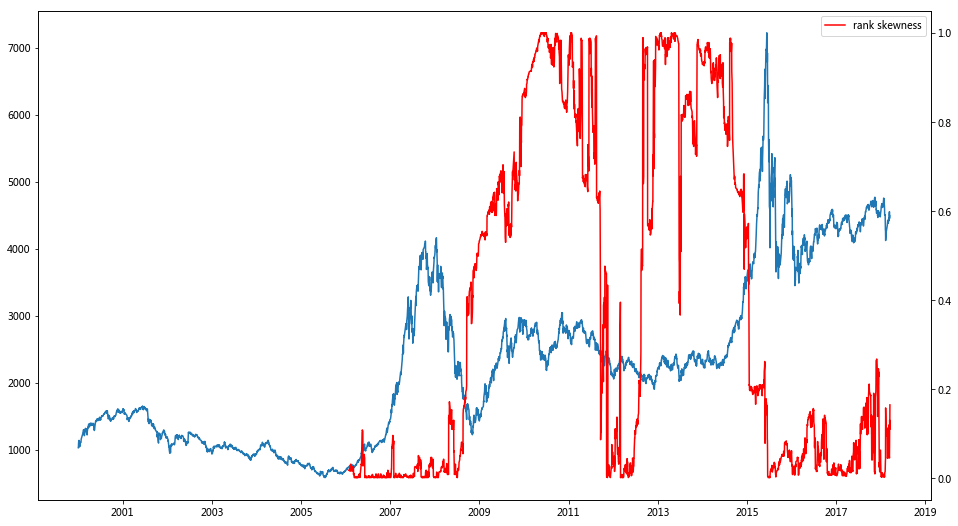

In [30]:
fig, ax1 = plt.subplots(figsize=(16, 9))
ax1.plot(df['close'])
ax2 = ax1.twinx()
ax2.plot(rank_skew, label='rank skewness', color='red')
ax2.legend()